In [7]:
import re
import torch as t
import torch.utils.data as d

with open('the-verdict.txt') as fp:
    text = fp.read()


In [2]:
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"', 'The', 'height', 'of', 'his', 'glory', '"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter', '--', 'deploring', 'his', 'unaccountable', 'abdication', '.', '"', 'Of', 'course', 'it', "'", 's', 'going', 'to', 'send', 'the', 'value', 'of', 'my', 'picture', "'", 'way', 'up', ';', 'but', 'I', 'don', "'", 't', 'think', 'of', 'that', ',

In [8]:
import tiktoken as tk

In [9]:
tokenizer = tk.get_encoding('gpt2')

In [5]:
encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
print(encoded)
print(tokenizer.decode(encoded))

[40, 367, 2885, 1464, 1807, 3619, 402, 271, 10899, 2138, 257, 7026, 15632, 438, 2016, 257, 922, 5891, 1576, 438, 568, 340, 373, 645, 1049, 5975, 284, 502, 284, 3285, 326, 11, 287, 262, 6001, 286, 465, 13476, 11, 339, 550, 5710, 465, 12036, 11, 6405, 257, 5527, 27075, 11, 290, 4920, 2241, 287, 257, 4489, 64, 319, 262, 34686, 41976, 13, 357, 10915, 314, 2138, 1807, 340, 561, 423, 587, 10598, 393, 28537, 2014, 198, 198, 1, 464, 6001, 286, 465, 13476, 1, 438, 5562, 373, 644, 262, 1466, 1444, 340, 13, 314, 460, 3285, 9074, 13, 46606, 536, 5469, 438, 14363, 938, 4842, 1650, 353, 438, 2934, 489, 3255, 465, 48422, 540, 450, 67, 3299, 13, 366, 5189, 1781, 340, 338, 1016, 284, 3758, 262, 1988, 286, 616, 4286, 705, 1014, 510, 26, 475, 314, 836, 470, 892, 286, 326, 11, 1770, 13, 8759, 2763, 438, 1169, 2994, 284, 943, 17034, 318, 477, 314, 892, 286, 526, 383, 1573, 11, 319, 9074, 13, 536, 5469, 338, 11914, 11, 33096, 663, 4808, 3808, 62, 355, 996, 484, 547, 12548, 287, 281, 13079, 410, 12523, 286, 

In [10]:
from data.dataset import create_dataloader_v1

## Attention mechanism for the LLM

In [11]:
inputs = t.tensor(
  [[0.43, 0.15, 0.89], # Your    
   [0.55, 0.87, 0.66], # journey
   [0.57, 0.85, 0.64], # starts 
   [0.22, 0.58, 0.33], # with   
   [0.77, 0.25, 0.10], # one    
   [0.05, 0.80, 0.55]] # step   
)

### Implementing a Casual Mask

In [12]:
from self_attention.self_attention import SelfAttention

din = inputs.shape[1]
dout = 4
context_length = inputs.shape[0]

t.manual_seed(123)
sa = SelfAttention(din, dout, context_length, False, 0.0)

sa(t.stack((inputs, inputs), dim=0))

tensor([[[-0.3479, -0.2524,  0.5302,  0.1182],
         [-0.2578,  0.0325,  0.6432,  0.3396],
         [-0.2297,  0.1291,  0.6798,  0.4106],
         [-0.1817,  0.1475,  0.6063,  0.3923],
         [-0.1874,  0.2015,  0.5906,  0.3778],
         [-0.1568,  0.1919,  0.5626,  0.3813]],

        [[-0.3479, -0.2524,  0.5302,  0.1182],
         [-0.2578,  0.0325,  0.6432,  0.3396],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [-0.1817,  0.1475,  0.6063,  0.3923],
         [-0.1874,  0.2015,  0.5906,  0.3778],
         [-0.1568,  0.1919,  0.5626,  0.3813]]], grad_fn=<UnsafeViewBackward0>)

In [13]:
import self_attention
from importlib import reload

import self_attention.multi_headed_attention
reload(self_attention.multi_headed_attention)
from self_attention.multi_headed_attention import MultiHeadedAttention

In [21]:
mha = MultiHeadedAttention(din, 4, context_length, 2, False, 0.0)

In [14]:
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(t.tensor(tokenizer.encode(txt1)))
batch.append(t.tensor(tokenizer.encode(txt2)))

batch = t.stack(batch, dim=0)
print(batch)


tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [15]:
import Model.model_config
reload(Model.model_config)

<module 'Model.model_config' from 'd:\\Programming\\LearnPy\\LLM\\Model\\model_config.py'>

In [16]:
from Model.model import GPTModel
from Model.model_config import Config

t.manual_seed(123)
cfg = Config()
GptModel = GPTModel(cfg)

In [17]:
import Model.model
reload(Model.model)

<module 'Model.model' from 'd:\\Programming\\LearnPy\\LLM\\Model\\model.py'>

In [18]:
test_val_ratio = 0.9
train_text = text[:int(len(text) * test_val_ratio)]
val_text = text[int(len(text) * test_val_ratio):]

train_loader = create_dataloader_v1(
    train_text, 2, cfg.CONTEXT_LENGTH, cfg.CONTEXT_LENGTH
)

val_loader = create_dataloader_v1(
    val_text, 2, cfg.CONTEXT_LENGTH, cfg.CONTEXT_LENGTH, False, False
)


In [16]:
from Model.model_train import train_model

optimizer = t.optim.AdamW(GptModel.parameters(), lr=4e-4, weight_decay=1e-1)

train_loss, val_loss, tokens_seen = train_model(GptModel, train_loader, val_loader,
                                                optimizer, 10, 2, 5, txt1, tokenizer, inputs.device)

In [19]:
import os
import urllib.request

# import requests
import json
import numpy as np
import tensorflow as tf
from tqdm import tqdm


def download_and_load_gpt2(model_size, models_dir):
    # Validate model size
    allowed_sizes = ("124M", "355M", "774M", "1558M")
    if model_size not in allowed_sizes:
        raise ValueError(f"Model size not in {allowed_sizes}")

    # Define paths
    model_dir = os.path.join(models_dir, model_size)
    base_url = "https://openaipublic.blob.core.windows.net/gpt-2/models"
    backup_base_url = "https://f001.backblazeb2.com/file/LLMs-from-scratch/gpt2"
    filenames = [
        "checkpoint", "encoder.json", "hparams.json",
        "model.ckpt.data-00000-of-00001", "model.ckpt.index",
        "model.ckpt.meta", "vocab.bpe"
    ]

    # Download files
    os.makedirs(model_dir, exist_ok=True)
    for filename in filenames:
        file_url = os.path.join(base_url, model_size, filename)
        backup_url = os.path.join(backup_base_url, model_size, filename)
        file_path = os.path.join(model_dir, filename)
        download_file(file_url, file_path, backup_url)

    # Load settings and params
    tf_ckpt_path = tf.train.latest_checkpoint(model_dir)
    settings = json.load(open(os.path.join(model_dir, "hparams.json")))
    params = load_gpt2_params_from_tf_ckpt(tf_ckpt_path, settings)

    return settings, params


def download_file(url, destination, backup_url=None):
    def _attempt_download(download_url):
        with urllib.request.urlopen(download_url) as response:
            # Get the total file size from headers, defaulting to 0 if not present
            file_size = int(response.headers.get("Content-Length", 0))

            # Check if file exists and has the same size
            if os.path.exists(destination):
                file_size_local = os.path.getsize(destination)
                if file_size == file_size_local:
                    print(f"File already exists and is up-to-date: {destination}")
                    return True  # Indicate success without re-downloading

            block_size = 1024  # 1 Kilobyte

            # Initialize the progress bar with total file size
            progress_bar_description = os.path.basename(download_url)
            with tqdm(total=file_size, unit="iB", unit_scale=True, desc=progress_bar_description) as progress_bar:
                with open(destination, "wb") as file:
                    while True:
                        chunk = response.read(block_size)
                        if not chunk:
                            break
                        file.write(chunk)
                        progress_bar.update(len(chunk))
            return True

    try:
        if _attempt_download(url):
            return
    except (urllib.error.HTTPError, urllib.error.URLError):
        if backup_url is not None:
            print(f"Primary URL ({url}) failed. Attempting backup URL: {backup_url}")
            try:
                if _attempt_download(backup_url):
                    return
            except urllib.error.HTTPError:
                pass

        # If we reach here, both attempts have failed
        error_message = (
            f"Failed to download from both primary URL ({url})"
            f"{' and backup URL (' + backup_url + ')' if backup_url else ''}."
            "\nCheck your internet connection or the file availability.\n"
            "For help, visit: https://github.com/rasbt/LLMs-from-scratch/discussions/273"
        )
        print(error_message)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

def load_gpt2_params_from_tf_ckpt(ckpt_path, settings):
    # Initialize parameters dictionary with empty blocks for each layer
    params = {"blocks": [{} for _ in range(settings["n_layer"])]}

    # Iterate over each variable in the checkpoint
    for name, _ in tf.train.list_variables(ckpt_path):
        # Load the variable and remove singleton dimensions
        variable_array = np.squeeze(tf.train.load_variable(ckpt_path, name))

        # Process the variable name to extract relevant parts
        variable_name_parts = name.split("/")[1:]  # Skip the 'model/' prefix

        # Identify the target dictionary for the variable
        target_dict = params
        if variable_name_parts[0].startswith("h"):
            layer_number = int(variable_name_parts[0][1:])
            target_dict = params["blocks"][layer_number]

        # Recursively access or create nested dictionaries
        for key in variable_name_parts[1:-1]:
            target_dict = target_dict.setdefault(key, {})

        # Assign the variable array to the last key
        last_key = variable_name_parts[-1]
        target_dict[last_key] = variable_array

    return params

In [ ]:
settings, params = download_and_load_gpt2("124M", "gpt2-model")

File already exists and is up-to-date: gpt2-model\124M\checkpoint
File already exists and is up-to-date: gpt2-model\124M\encoder.json
File already exists and is up-to-date: gpt2-model\124M\hparams.json
File already exists and is up-to-date: gpt2-model\124M\model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2-model\124M\model.ckpt.index
File already exists and is up-to-date: gpt2-model\124M\model.ckpt.meta
File already exists and is up-to-date: gpt2-model\124M\vocab.bpe


In [20]:
import Model.load_weights
reload(Model.load_weights)
from Model.load_weights import load_weights
from Model.load_weights import load_weights_into_gpt

In [21]:
emb = t.nn.Embedding(3, 2)
emb(t.tensor([0, 1, 2]))

tensor([[ 0.1089,  1.2683],
        [ 1.0283,  0.2831],
        [-1.1936,  1.4159]], grad_fn=<EmbeddingBackward0>)

In [15]:
t.manual_seed(123)


# load_weights(GptModel, params)
load_weights_into_gpt(GptModel, params)

In [31]:
from Model.model import generate_text
from Model.text_conversion import tokens_to_text, text_to_token

GptModel.eval()
t.manual_seed(123)
txt = generate_text(GptModel, text_to_token(txt1, tokenizer), 25, cfg.CONTEXT_LENGTH, 1.4, 50)
print(tokens_to_text(txt, tokenizer))

Every effort moves you toward an equal in all matters. In this sense Plato defined gravity as an attraction between particles that have a velocity to travel at


## Fine Tuning the LLM for a classification task

In [21]:
spam_data_file = "sms_spam_collection/SMSSpamCollection.tsv"
import pandas as pd
df = pd.read_csv(spam_data_file, sep='\t', names=['label', 'text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [25]:
from classification.dataset import get_balanced_dataset, random_split

In [26]:
balanced_df = get_balanced_dataset(df)
balanced_df.reset_index(inplace=True, drop=True)
balanced_df['label'] = (balanced_df['label'] == 'spam').astype(int)
balanced_df

,label,text
0,1,Free entry in 2 a wkly comp to win FA Cup fina...
1,1,FreeMsg Hey there darling it's been 3 week's n...
2,1,WINNER!! As a valued network customer you have...
3,1,Had your mobile 11 months or more? U R entitle...
4,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
1489,0,Wow so healthy. Old airport rd lor. Cant thk o...
1490,0,Dear good morning how you feeling dear
1491,0,Dont put your phone on silent mode ok
1492,0,Gam gone after outstanding innings.


In [27]:
train_df, val_df, test_df = random_split(balanced_df, 0.7, 0.1)

In [28]:
data_path = 'sms_spam_collection'
train_df.to_csv(f'{data_path}/train.csv', index=False)
val_df.to_csv(f'{data_path}/val.csv', index=False)
test_df.to_csv(f'{data_path}/test.csv', index=False)

In [29]:
from data.spam_dataset import SpamDataset

train_dataset = SpamDataset(f'{data_path}/train.csv', tokenizer)
val_dataset = SpamDataset(f'{data_path}/val.csv', tokenizer, train_dataset.max_length)
test_dataset = SpamDataset(f'{data_path}/test.csv', tokenizer, train_dataset.max_length)

In [30]:
num_workers = 0
batch_size = 8
t.manual_seed(123)

train_loader = d.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, drop_last=True)
val_loader = d.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, drop_last=False)
test_loader = d.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, drop_last=False)

In [31]:
for parameter in GptModel.parameters():
    parameter.requires_grad = False
for parameter in GptModel.transformer_blocks[-1].parameters():
    parameter.requires_grad = True
for parameter in GptModel.final_norm.parameters():
    parameter.requires_grad = True

In [35]:
GptModel.out_head = t.nn.Linear(cfg.EMBED_DIM, 2)

GPTModel(
  (token_embedding): Embedding(50257, 768)
  (pos_embedding): Embedding(1024, 768)
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer_blocks): Sequential(
    (0): TransformerBlock(
      (attn): MultiHeadedAttention(
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (attn): MultiHeadedAttention(
        (W_k

In [44]:
from classification.loss import calc_accuracy_classification_loader

train_acc = calc_accuracy_classification_loader(train_loader, GptModel, inputs.device, 10)
val_acc = calc_accuracy_classification_loader(val_loader, GptModel, inputs.device, 10)
test_acc = calc_accuracy_classification_loader(test_loader, GptModel, inputs.device, 10)

print(f"Train accuracy: {train_acc:.2f}")
print(f"Validation accuracy: {val_acc:.2f}")
print(f"Test accuracy: {test_acc:.2f}")

Train accuracy: 0.51
Validation accuracy: 0.45
Test accuracy: 0.49


In [45]:
from classification.training import train_classifier

t.manual_seed(123)

optimizer = t.optim.AdamW(GptModel.parameters(), lr=5e-5, weight_decay=1e-1)
num_epochs = 5

train_losses, val_losses, train_accs, val_accs = train_classifier(GptModel, train_loader, val_loader, 
                                                                  optimizer, inputs.device, num_epochs, 50, 5)


Epoch 1, Global Step 50, Train Loss: 0.6869834303855896, Val Loss: 0.7019241690635681
Epoch 1, Global Step 100, Train Loss: 0.6317585110664368, Val Loss: 0.6519562363624573
Epoch 1, Train Accuracy: 0.4, Val Accuracy: 0.5
Epoch 2, Global Step 150, Train Loss: 0.6601837456226349, Val Loss: 0.6695411562919616
Epoch 2, Global Step 200, Train Loss: 0.6945111870765686, Val Loss: 0.6476420879364013
Epoch 2, Global Step 250, Train Loss: 0.64356609582901, Val Loss: 0.6928026437759399
Epoch 2, Train Accuracy: 0.775, Val Accuracy: 0.65
Epoch 3, Global Step 300, Train Loss: 1.4209850311279297, Val Loss: 1.2275010585784911
Epoch 3, Global Step 350, Train Loss: 0.59688680768013, Val Loss: 0.5544122755527496
Epoch 3, Train Accuracy: 0.625, Val Accuracy: 0.55
Epoch 4, Global Step 400, Train Loss: 0.8673141300678253, Val Loss: 0.7792842626571655
Epoch 4, Global Step 450, Train Loss: 0.7063592493534088, Val Loss: 0.7901633262634278
Epoch 4, Global Step 500, Train Loss: 0.5319112837314606, Val Loss: 0.51

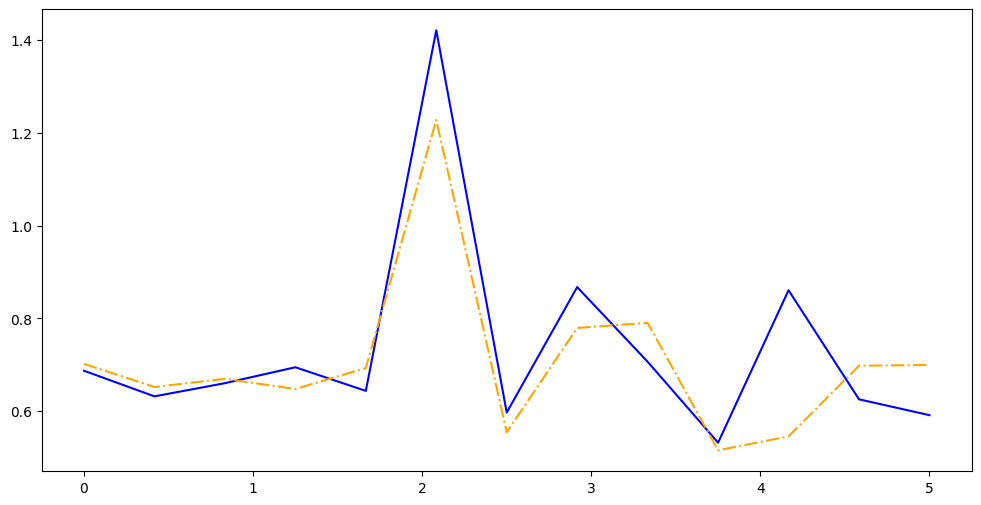

In [46]:
import matplotlib.pyplot as plt

epochs = t.linspace(0, num_epochs, len(train_losses))
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_losses, label='Train loss', color='blue')
plt.plot(epochs, val_losses, label='Validation loss', linestyle='-.', color='orange')



In [48]:
import classification.classification
reload(classification.classification)

<module 'classification.classification' from 'd:\\Programming\\LearnPy\\LLM\\classification\\classification.py'>

In [53]:
from classification.classification import classify

txt = "Congratulations! You've won a free trip to the Bahamas. Click here to claim your prize."

classify(txt1, GptModel, tokenizer, inputs.device, cfg, train_dataset.max_length)

0

In [54]:
t.save(GptModel.state_dict(), 'text_classifier.pth')


## Instruction tuning the LLM


### Downloading the instruction response pairs

In [21]:
from importlib import reload

import instructions.dataset
reload(instructions.dataset)
import instructions.data
reload(instructions.data)

<module 'instructions.data' from 'd:\\Programming\\LearnPy\\LLM\\instructions\\data.py'>

In [26]:
from instructions.data import downlaod_and_load_file, format_input_alpaca
from instructions.dataset import InstructionDataset, custom_collate

filepath = "instruction_data.json"
url = "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/a48f9c7fe2c26340fd1c3724238f98159af022ce/ch07/01_main-chapter-code/instruction-data.json"

data = downlaod_and_load_file(filepath, url)
print(format_input_alpaca(data[50]))

Below is an instruction that describes a task.
Write a response that appropriately completes the request.

### Instruction:
Identify the correct spelling of the following word.

### Input:
Ocassion


In [27]:
train_size = int(0.85*(len(data)))
val_size = int(0.1*len(data))
test_size = int(len(data) - train_size - val_size)

train_data = data[:train_size]
val_data = data[train_size:train_size+val_size]
test_data = data[train_size+val_size:]

print(len(train_data), len(val_data), len(test_data))

935 110 55


In [28]:
train_dataset = InstructionDataset(train_data, tokenizer)
val_dataset = InstructionDataset(val_data, tokenizer)
test_dataset = InstructionDataset(test_data, tokenizer)

In [29]:
def get_instruction_dataloader(dataset, shuffle=True, drop_last=True, batch_size=8, num_workers=0, collate_fn=custom_collate):
    return d.DataLoader(dataset, 
                        batch_size=batch_size, 
                        shuffle=shuffle, 
                        num_workers=num_workers,
                        collate_fn=collate_fn, 
                        drop_last=drop_last)

train_loader = get_instruction_dataloader(train_dataset)
val_loader = get_instruction_dataloader(val_dataset, shuffle=False, drop_last=False)
test_loader = get_instruction_dataloader(test_dataset, shuffle=False, drop_last=False)

In [33]:
print("Train loader:")
for input, target in train_loader:
    print(input.shape, target.shape)

Train loader:
torch.Size([8, 76]) torch.Size([8, 76])
torch.Size([8, 71]) torch.Size([8, 71])
torch.Size([8, 63]) torch.Size([8, 63])
torch.Size([8, 66]) torch.Size([8, 66])
torch.Size([8, 93]) torch.Size([8, 93])
torch.Size([8, 90]) torch.Size([8, 90])
torch.Size([8, 73]) torch.Size([8, 73])
torch.Size([8, 92]) torch.Size([8, 92])
torch.Size([8, 82]) torch.Size([8, 82])
torch.Size([8, 73]) torch.Size([8, 73])
torch.Size([8, 65]) torch.Size([8, 65])
torch.Size([8, 83]) torch.Size([8, 83])
torch.Size([8, 79]) torch.Size([8, 79])
torch.Size([8, 74]) torch.Size([8, 74])
torch.Size([8, 74]) torch.Size([8, 74])
torch.Size([8, 59]) torch.Size([8, 59])
torch.Size([8, 63]) torch.Size([8, 63])
torch.Size([8, 66]) torch.Size([8, 66])
torch.Size([8, 68]) torch.Size([8, 68])
torch.Size([8, 65]) torch.Size([8, 65])
torch.Size([8, 73]) torch.Size([8, 73])
torch.Size([8, 82]) torch.Size([8, 82])
torch.Size([8, 70]) torch.Size([8, 70])
torch.Size([8, 85]) torch.Size([8, 85])
torch.Size([8, 69]) torch.

In [3]:
settings, params = download_and_load_gpt2("355M", "gpt2-model")

File already exists and is up-to-date: gpt2-model\355M\checkpoint
File already exists and is up-to-date: gpt2-model\355M\encoder.json
File already exists and is up-to-date: gpt2-model\355M\hparams.json
File already exists and is up-to-date: gpt2-model\355M\model.ckpt.data-00000-of-00001


model.ckpt.index: 100%|██████████| 10.4k/10.4k [00:00<?, ?iB/s]
model.ckpt.meta: 100%|██████████| 927k/927k [00:02<00:00, 387kiB/s]  
vocab.bpe: 100%|██████████| 456k/456k [00:01<00:00, 330kiB/s]  


In [24]:
# TODO: load the 355M parameter model later
cfg = Config()
cfg.EMBED_DIM = 1280
cfg.N_LAYERS = 24
cfg.N_HEADS = 16

In [ ]:
GptModel = GPTModel(cfg)
load_weights_into_gpt(GptModel, params)
GptModel.eval()

In [23]:
import Model.loss


reload(Model.loss)

<module 'Model.loss' from 'd:\\Programming\\LearnPy\\LLM\\Model\\loss.py'>

In [35]:
from Model.loss import calc_loss_loader
with t.no_grad():
    train_loss = calc_loss_loader(GptModel, train_loader, inputs.device, 5)
print(f"Train loss: {train_loss:.2f}")

Train loss: 4.20


In [32]:
input_instruction = format_input_alpaca(val_data[25])
print(input_instruction)

print(tokens_to_text(
    generate_text(
        GptModel, text_to_token(input_instruction, tokenizer), 35, cfg.CONTEXT_LENGTH, 1.4, 50
    )
, tokenizer))

Below is an instruction that describes a task.
Write a response that appropriately completes the request.

### Instruction:
Define the term 'hyperbole'.
Below is an instruction that describes a task.
Write a response that appropriately completes the request.

### Instruction:
Define the term 'hyperbole'.

### Response:
The term 'hyperbole' is derived from the German noun hypergehund, meaning laugh, with reference to its humor.


In [ ]:
from Model.model_train import train_model

# Unable to train model on my machine, utilizing Google Colab to train the model 
optimizer = t.optim.AdamW(GptModel.parameters(), lr=5e-5, weight_decay=1e-1)
num_epochs = 2

train_losses, val_losses, tokens_seen = train_model(GptModel, train_loader, val_loader,
                                                    optimizer, num_epochs, 5, 5, input_instruction,
                                                    tokenizer, inputs.device)

<Figure size 1200x600 with 0 Axes>

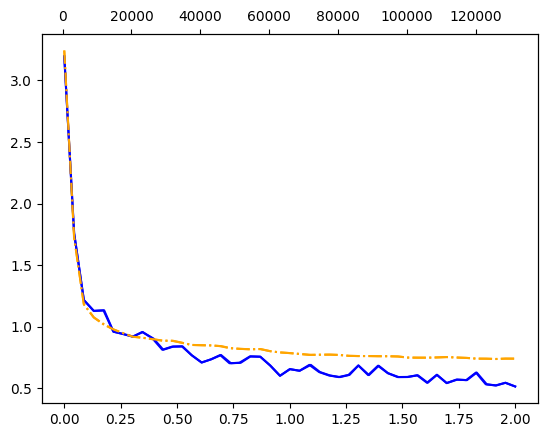

In [ ]:
import matplotlib.pyplot as plt

epochs = t.linspace(0, num_epochs, len(train_losses))
tokens_seen = t.tensor(tokens_seen)
plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots()
ax1.plot(epochs, train_losses, label='Train loss', color='blue')
ax1.plot(epochs, val_losses, label='Val loss', color='orange', linestyle='-.')

ax2 = ax1.twiny()
ax2.plot(tokens_seen, train_losses, label='Train loss', color='blue')
ax2.plot(tokens_seen, val_losses, label='Val loss', color='orange', linestyle='-.')

In [34]:
t.manual_seed(123)

for i, entry in tqdm(enumerate(test_data), total=len(test_data)):
    input_instruction = format_input_alpaca(entry)

    generated_response = tokens_to_text(
        generate_text(
            GptModel, text_to_token(input_instruction, tokenizer), 256, cfg.CONTEXT_LENGTH, 1.4, 50, 50256
        )
    , tokenizer)
    
    model_response = generated_response.split("### Response:")[-1].strip()

    test_data[i]['model_response'] = model_response

In [35]:
import json
with open('instruction_data_with_model_responses.json', 'w') as fp:
    json.dump(test_data, fp, indent=2)